ESS with 201812 bloom timing

In [9]:
import datetime as dt
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

from salishsea_tools import places

%matplotlib inline

In [10]:
directory = 'ESS_2018'

In [11]:
def get_the_data(year):
    evenlessink = []
    thestring = f'/data/sallen/results/MEOPAR/202007/{directory}/SalishSea_1d_{year}03*ptrc_T*.nc'
    for filename in sorted(glob.glob(thestring)):
        data = xr.open_dataset(filename)
        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
        evenlessink.append(data_extract)
        data.close()
    thestring = f'/data/sallen/results/MEOPAR/202007/{directory}/SalishSea_1d_{year}04*ptrc_T*.nc'
    for filename in sorted(glob.glob(thestring)):
        data = xr.open_dataset(filename)
        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
        evenlessink.append(data_extract)
        data.close()    

    timeseries = xr.concat(evenlessink, dim='time_counter')
    return timeseries

In [12]:
def get_the_data_H201812(year):
    evenlessink = []
    thestring = f'/results/SalishSea/nowcast-green.201812/*/SalishSea_1d_{year}03*ptrc_T*.nc'
    for filename in sorted(glob.glob(thestring)):
        data = xr.open_dataset(filename)
        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
        evenlessink.append(data_extract)
        data.close()
    thestring = f'/results/SalishSea/nowcast-green.201812/*/SalishSea_1d_{year}04*ptrc_T*.nc'
    for filename in sorted(glob.glob(thestring)):
        data = xr.open_dataset(filename)
        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
        evenlessink.append(data_extract)
        data.close()    

    timeseries = xr.concat(evenlessink, dim='time_counter')
    return timeseries

In [13]:
timeseries2015 = get_the_data('2015')

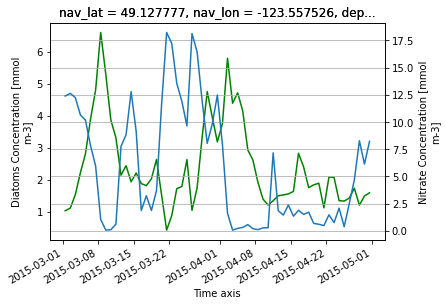

In [14]:
fig, ax = plt.subplots(1, 1)
timeseries2015.diatoms.plot(ax=ax, color='g')
ax2 = ax.twinx()
timeseries2015.nitrate.plot(ax=ax2);
ax2.grid()

In [15]:
old2015 = get_the_data_H201812('2015')

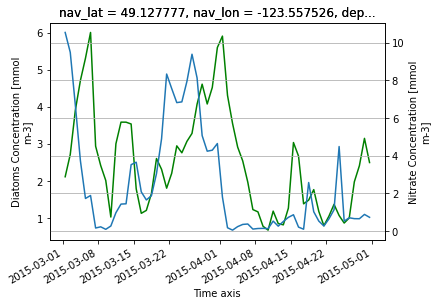

In [16]:
fig, ax = plt.subplots(1, 1)
old2015.diatoms.plot(ax=ax, color='g')
ax2 = ax.twinx()
old2015.nitrate.plot(ax=ax2);
ax2.grid()

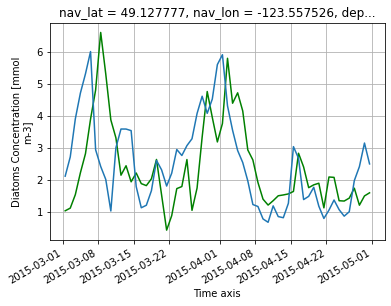

In [17]:
fig, ax = plt.subplots(1, 1)
timeseries2015.diatoms.plot(ax=ax, color='g')
old2015.diatoms.plot(ax=ax);
ax.grid()

In [18]:
timeseries2016 = get_the_data('2016')

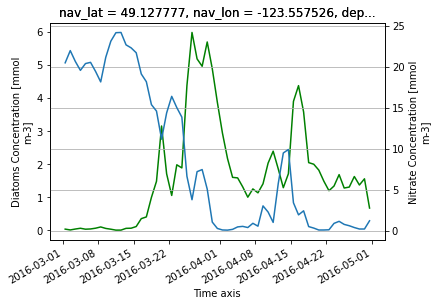

In [19]:
fig, ax = plt.subplots(1, 1)
timeseries2016.diatoms.plot(ax=ax, color='g')
ax2 = ax.twinx()
timeseries2016.nitrate.plot(ax=ax2);
ax2.grid()

In [20]:
old2016 = get_the_data_H201812('2016')

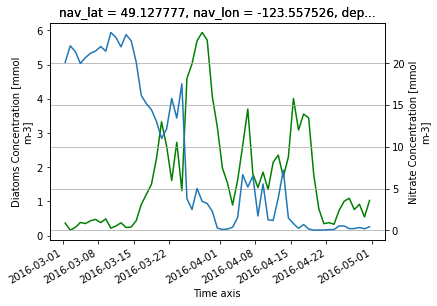

In [21]:
fig, ax = plt.subplots(1, 1)
old2016.diatoms.plot(ax=ax, color='g')
ax2 = ax.twinx()
old2016.nitrate.plot(ax=ax2);
ax2.grid()

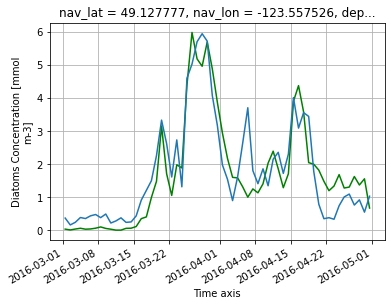

In [22]:
fig, ax = plt.subplots(1, 1)
timeseries2016.diatoms.plot(ax=ax, color='g')
old2016.diatoms.plot(ax=ax);
ax.grid()

In [23]:
timeseries2017 = get_the_data('2017')

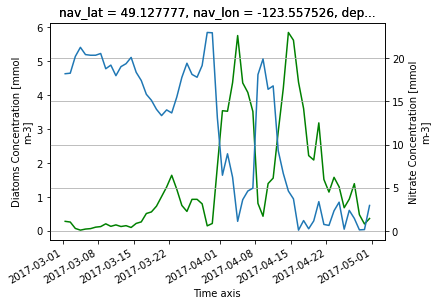

In [24]:
fig, ax = plt.subplots(1, 1)
timeseries2017.diatoms.plot(ax=ax, color='g')
ax2 = ax.twinx()
timeseries2017.nitrate.plot(ax=ax2);
ax2.grid()

In [25]:
old2017 = get_the_data_H201812('2017')

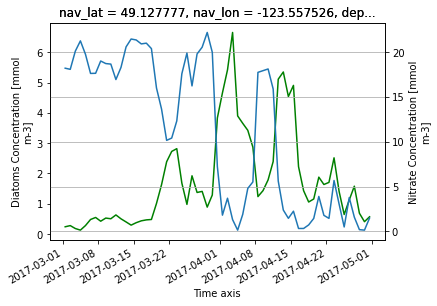

In [26]:
fig, ax = plt.subplots(1, 1)
old2017.diatoms.plot(ax=ax, color='g')
ax2 = ax.twinx()
old2017.nitrate.plot(ax=ax2);
ax2.grid()

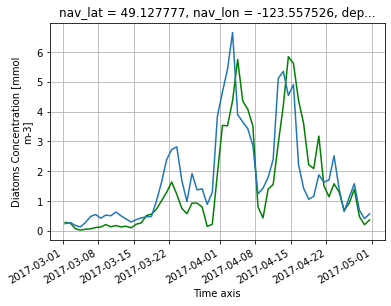

In [27]:
fig, ax = plt.subplots(1, 1)
timeseries2017.diatoms.plot(ax=ax, color='g')
old2017.diatoms.plot(ax=ax);
ax.grid()

In [28]:
df1 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20140804T234330Z_20150604T070614Z-clean.csv',
        skiprows=78, header=None,
        names=('TimeUTC','CDOM','CDOMQC','Chlorophyll_ug','ChlQC','Turbidity_NTU','TurbQC','Lat','LatQC','Lon','LongQC'))
df2 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20150604T070624Z_20160307T160206Z-clean.csv',
        skiprows=78, header=None,
        names=('TimeUTC', 'CDOM', 'CDOMQC', 'Chlorophyll_ug', 'ChlQC', 'Turbidity_NTU', 'TurbQC', 'Lat',
               'LatQC', 'Lon', 'LongQC'))

/home/sallen/anaconda/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/sallen/anaconda/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (1,3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
df3 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20160307T160215Z_20161019T064047Z-clean.csv',
                 skiprows=78, header=None,
        names=('TimeUTC', 'CDOM', 'CDOMQC', 'Chlorophyll_ug', 'ChlQC', 'Turbidity_NTU', 'TurbQC', 'Lat',
               'LatQC', 'Lon', 'LongQC'))

In [36]:
df3

,TimeUTC,CDOM,CDOMQC,Chlorophyll_ug,ChlQC,Turbidity_NTU,TurbQC,Lat,LatQC,Lon,LongQC
0,2016-03-07T16:02:15.963Z,6.4539,1,1.3431,1,1.9602,1,49.211714914,8,-123.832606118,8
1,2016-03-07T16:02:26.138Z,6.4539,1,1.331,1,1.9602,1,49.211833277,8,-123.83130034,8
2,2016-03-07T16:02:36.302Z,6.4539,1,1.2826,1,2.0086,1,49.212036625,8,-123.830098561,8
3,2016-03-07T16:02:46.477Z,6.363,1,1.2826,1,2.2022,1,49.212220022,8,-123.828959736,8
4,2016-03-07T16:02:56.641Z,6.4539,1,1.2584,1,2.2264,1,49.212386477,8,-123.827718951,8
...,...,...,...,...,...,...,...,...,...,...,...
999995,2016-10-19T06:40:07.209Z,8.2705,1,2.3837,1,4.44,1,49.121378951,8,-123.537498251,8
999996,2016-10-19T06:40:17.384Z,8.2705,1,2.3353,1,4.736,1,49.12084063,8,-123.536337511,8
999997,2016-10-19T06:40:27.559Z,8.3678,1,2.3474,1,4.588,1,49.120332134,8,-123.535190695,8
999998,2016-10-19T06:40:37.735Z,8.3678,1,2.541,1,4.81,1,49.119673023,8,-123.534147176,8


In [49]:
df4 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170217T003041Z_20170315T031911Z-clean.csv',
                 skiprows=66, header=None,
        names=('TimeUTC', 'CDOM', 'CDOMQC', 'Chlorophyll_ug', 'ChlQC', 'Turbidity_NTU', 'TurbQC', 'Lat',
               'LatQC', 'Lon', 'LongQC', "Pitch (deg)", "Pitch QC Flag"  , "Roll (deg)", "Roll QC Flag"  , "True Heading (deg)", "True Heading QC Flag"))

/home/sallen/anaconda/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (7,9,11,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [50]:
df5 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170315T031912Z_20170404T195130Z-clean.csv',
                 skiprows=66, header=None,
        names=('TimeUTC', 'CDOM', 'CDOMQC', 'Chlorophyll_ug', 'ChlQC', 'Turbidity_NTU', 'TurbQC', 'Lat',
               'LatQC', 'Lon', 'LongQC', "Pitch (deg)", "Pitch QC Flag"  , "Roll (deg)", "Roll QC Flag"  , "True Heading (deg)", "True Heading QC Flag"))

/home/sallen/anaconda/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,7,9,11,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,TimeUTC,CDOM,CDOMQC,Chlorophyll_ug,ChlQC,Turbidity_NTU,TurbQC,Lat,LatQC,Lon,LongQC,Pitch (deg),Pitch QC Flag,Roll (deg),Roll QC Flag,True Heading (deg),True Heading QC Flag
0,2017-03-15T03:19:12.593Z,12.2624,1,2.3364,1,23.0928,1,49.0029,8,-123.151,8,0.71088,8,1.0022,8,265.012,8
1,2017-03-15T03:19:13.667Z,12.2624,1,2.3718,1,23.0112,1,49.0029,8,-123.151,8,1.59825,8,1.0415,8,265.221,8
2,2017-03-15T03:19:14.741Z,11.9750,1,2.36,1,23.154,1,49.0029,8,-123.151,8,2.47019,8,1.1318,8,265.458,8
3,2017-03-15T03:19:15.816Z,12.0708,1,2.3482,1,22.3176,1,49.0029,8,-123.151,8,3.43859,8,1.05335,8,265.672,8
4,2017-03-15T03:19:16.890Z,11.5918,1,2.3954,1,22.5624,1,49.0029,8,-123.151,8,4.45158,8,0.838277,8,265.817,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2017-04-04T19:51:26.548Z,11.8792,1,7.965,1,24.9696,1,49.1788,8,-123.888,8,4.43312,8,0.2474,8,186.209,8
999996,2017-04-04T19:51:27.622Z,11.9750,1,8.1302,1,26.622,1,49.1789,8,-123.888,8,4.2056,8,0.1904,8,186.257,8
999997,2017-04-04T19:51:28.697Z,13.3162,1,7.9178,1,31.5792,1,49.179,8,-123.888,8,3.92048,8,0.1,8,186.317,8
999998,2017-04-04T19:51:29.771Z,13.3162,1,8.1538,1,27.0096,1,49.1791,8,-123.888,8,3.91356,8,0.1,8,186.389,8


In [53]:
df6 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170404T195131Z_20170426T173215Z-clean.csv',
                 skiprows=78, header=None,
        names=('TimeUTC', 'CDOM', 'CDOMQC', 'Chlorophyll_ug', 'ChlQC', 'Turbidity_NTU', 'TurbQC', 'Lat',
               'LatQC', 'Lon', 'LongQC', "Pitch (deg)", "Pitch QC Flag"  , "Roll (deg)", "Roll QC Flag"  , "True Heading (deg)", "True Heading QC Flag"))

In [54]:
df = pd.concat([df1.drop(df1[df1.TimeUTC<'2015'].index),
                df2.drop(df2[df2.TimeUTC>'2018'].index),
                df3.drop(df3[df3.TimeUTC>'2018'].index),
                df4.drop(df4[df4.TimeUTC>'2018'].index),
                df5.drop(df5[df5.TimeUTC>'2018'].index),
                df6.drop(df6[df6.TimeUTC>'2018'].index),
               ], ignore_index=True)

In [55]:
dts = [dt.datetime(int(r[0:4]),int(r[5:7]),int(r[8:10]),int(r[11:13]),int(r[14:16]),int(r[17:19])) for r in df['TimeUTC']]
df = df.assign(dts=dts)
df['Lat'] = pd.to_numeric(df['Lat'],errors='coerce')
df['Lon'] = pd.to_numeric(df['Lon'],errors='coerce')

In [56]:
llon = places.PLACES['S3']['lon lat'][0] - .01
ulon = places.PLACES['S3']['lon lat'][0] + .01
llat = places.PLACES['S3']['lon lat'][1] - .01
ulat = places.PLACES['S3']['lon lat'][1] + .01
iidfnd = (df.Lon > llon) & (df.Lon < ulon) & (df.Lat > llat) & (df.Lat < ulat)

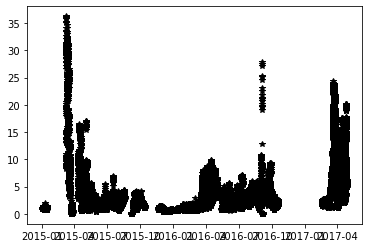

In [58]:
fig,ax = plt.subplots(1,1)
ax.plot(df.loc[iidfnd, ['dts']], df.loc[iidfnd, ['Chlorophyll_ug']], 'k*');

In [8]:
! ls /ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search4979680/

BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170217T003041Z_20170315T031911Z-clean.csv
BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170315T031912Z_20170404T195130Z-clean.csv
BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170404T195131Z_20170426T173215Z-clean.csv
BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170426T173216Z_20170522T011843Z-clean.csv
BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170522T011844Z_20170611T234016Z-clean.csv
BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170611T234017Z_20170702T172228Z-clean.csv
BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170702T172229Z_20170722T182606Z-clean.csv
BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170722T182607Z_20170815T213737Z-clean.csv


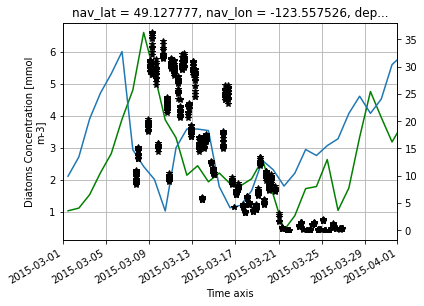

In [59]:
fig, ax = plt.subplots(1, 1)
timeseries2015.diatoms.plot(ax=ax, color='g')
old2015.diatoms.plot(ax=ax);
ax.grid()
ax2 = ax.twinx()
ax2.plot(df.loc[iidfnd, ['dts']], df.loc[iidfnd, ['Chlorophyll_ug']], 'k*')
ax.set_xlim((dt.datetime(2015, 3, 1),dt.datetime(2015, 4, 1)));

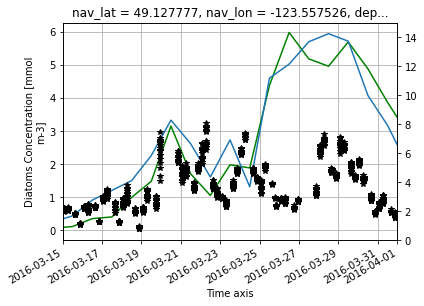

In [62]:
fig, ax = plt.subplots(1, 1)
timeseries2016.diatoms.plot(ax=ax, color='g')
old2016.diatoms.plot(ax=ax);
ax.grid()
ax2 = ax.twinx()
ax2.plot(df.loc[iidfnd, ['dts']], df.loc[iidfnd, ['Chlorophyll_ug']], 'k*')
ax2.set_ylim(0, 15)
ax.set_xlim((dt.datetime(2016, 3, 15),dt.datetime(2016, 4, 1)));

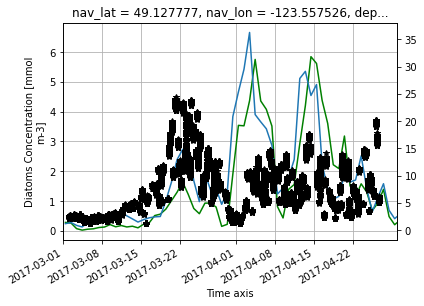

In [61]:
fig, ax = plt.subplots(1, 1)
timeseries2017.diatoms.plot(ax=ax, color='g')
old2017.diatoms.plot(ax=ax);
ax.grid()
ax2 = ax.twinx()
ax2.plot(df.loc[iidfnd, ['dts']], df.loc[iidfnd, ['Chlorophyll_ug']], 'k*')
#ax2.set_ylim(0, 15)
ax.set_xlim((dt.datetime(2017, 3, 1),dt.datetime(2017, 4, 30)));